# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [46]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#load data
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [48]:
#check for data types
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [49]:
#drop columns name and doctor
df.drop(['Name', 'Doctor', 'Room Number'], axis=1, inplace=True)

In [50]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,81,Female,O-,Diabetes,2022-11-17,Wallace-Hamilton,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
1,35,Male,O+,Asthma,2023-06-01,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,Walton LLC,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,49,Male,B-,Asthma,2020-05-02,Garcia Ltd,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal


In [51]:
#date time format date of admission and date of discharge
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['Date of Admission'] = df['Date of Admission'].dt.strftime('%d-%m-%Y')
df['Discharge Date'] = df['Discharge Date'].dt.strftime('%d-%m-%Y')

In [52]:
#encode categorical data into numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

# Display unique values of each categorical column before encoding
for col in categorical_cols:
    print(f"Unique value in {col}: {df[col].unique()}")

# Apply Label Encoder to categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

Unique value in Gender: ['Female' 'Male']
Unique value in Blood Type: ['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']
Unique value in Medical Condition: ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
Unique value in Hospital: ['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Nash-Krueger' 'Wilson-Lyons' 'Torres, Young and Stewart']
Unique value in Insurance Provider: ['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
Unique value in Admission Type: ['Elective' 'Emergency' 'Urgent']
Unique value in Medication: ['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
Unique value in Test Results: ['Inconclusive' 'Normal' 'Abnormal']


,Age,Gender,Blood Type,Medical Condition,Date of Admission,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,81,0,7,3,17-11-2022,7960,3,37490.983364,0,01-12-2022,0,1
1,35,1,6,1,01-06-2023,978,4,47304.064845,1,15-06-2023,2,2
2,61,1,5,5,09-01-2019,7996,3,36874.896997,1,08-02-2019,2,2
3,49,1,5,1,02-05-2020,2482,3,23303.322092,2,03-05-2020,4,0
4,51,1,7,0,09-07-2021,3908,4,18086.344184,2,02-08-2021,3,2


In [65]:
#scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_numeric = df.select_dtypes(include=[np.number])
X_scaled = scaler.fit_transform(df_numeric)

In [66]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.136868e-16,1.145750e-16,-6.714629e-17,9.663381e-17,-3.623768e-17,1.136868e-17,3.410605e-17,2.700062e-17,3.481659e-17,-9.237056e-18,3.197442e-17,-7.744916e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.707791e+00,-9.851108e-01,-1.531569e+00,-1.461758e+00,-1.739814e+00,-1.401229e+00,-1.742898e+00,-1.246353e+00,-1.424595e+00,-1.196870e+00,-1.690950e+00,-1.192231e+00
25%,-8.399124e-01,-9.851108e-01,-6.566616e-01,-8.741167e-01,-8.614932e-01,-6.935017e-01,-8.538163e-01,-1.246353e+00,-7.196289e-01,-1.196870e+00,-8.780939e-01,-8.222655e-01
50%,2.796611e-02,-9.851108e-01,-2.192080e-01,-2.864752e-01,-3.173114e-03,1.422531e-02,-1.839068e-02,-1.829801e-02,-1.466329e-02,2.305662e-02,5.088481e-02,-2.697783e-01
75%,8.447930e-01,1.015114e+00,6.556992e-01,8.888077e-01,8.675473e-01,7.219523e-01,8.685195e-01,1.209757e+00,6.903024e-01,1.242984e+00,8.637412e-01,5.876733e-01
max,1.712672e+00,1.015114e+00,1.530606e+00,1.476449e+00,1.715467e+00,1.429679e+00,1.740230e+00,1.209757e+00,1.395268e+00,1.242984e+00,1.676598e+00,3.328930e+00


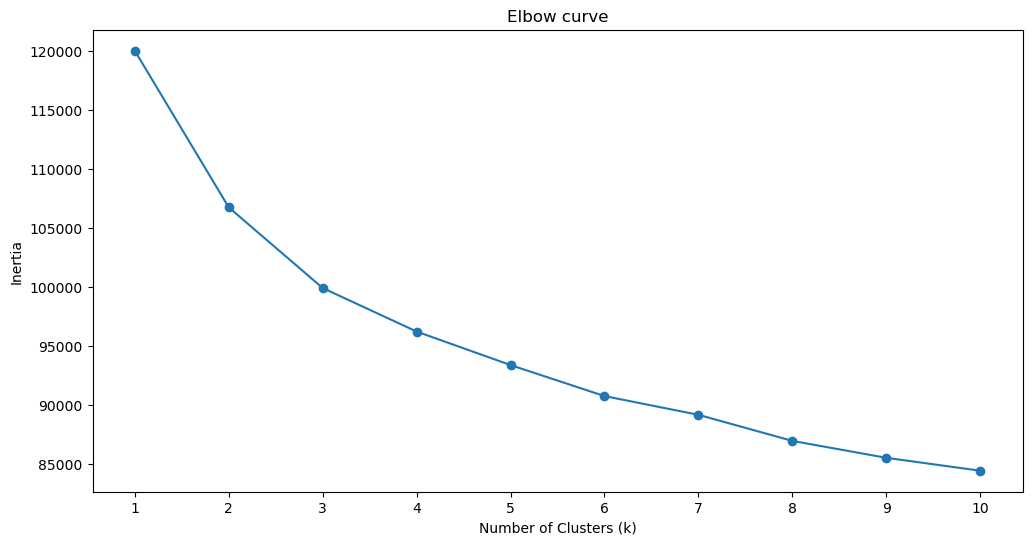

In [74]:
#clcustering using elbow method
from sklearn.cluster import KMeans

# Create empty list to store inertia values
inertia = []

#define range of clusters
k_range = range(1, 11)

# Loop through each value of k
for k in k_range:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,n_init=10, random_state=42)
    
    # Fit data to model
    model.fit(X_scaled)
    
    # Append the inertia for `model` to the list of inertia
    inertia.append(model.inertia_)

# Plot range vs inertia
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.xticks(k_range)
plt.show()

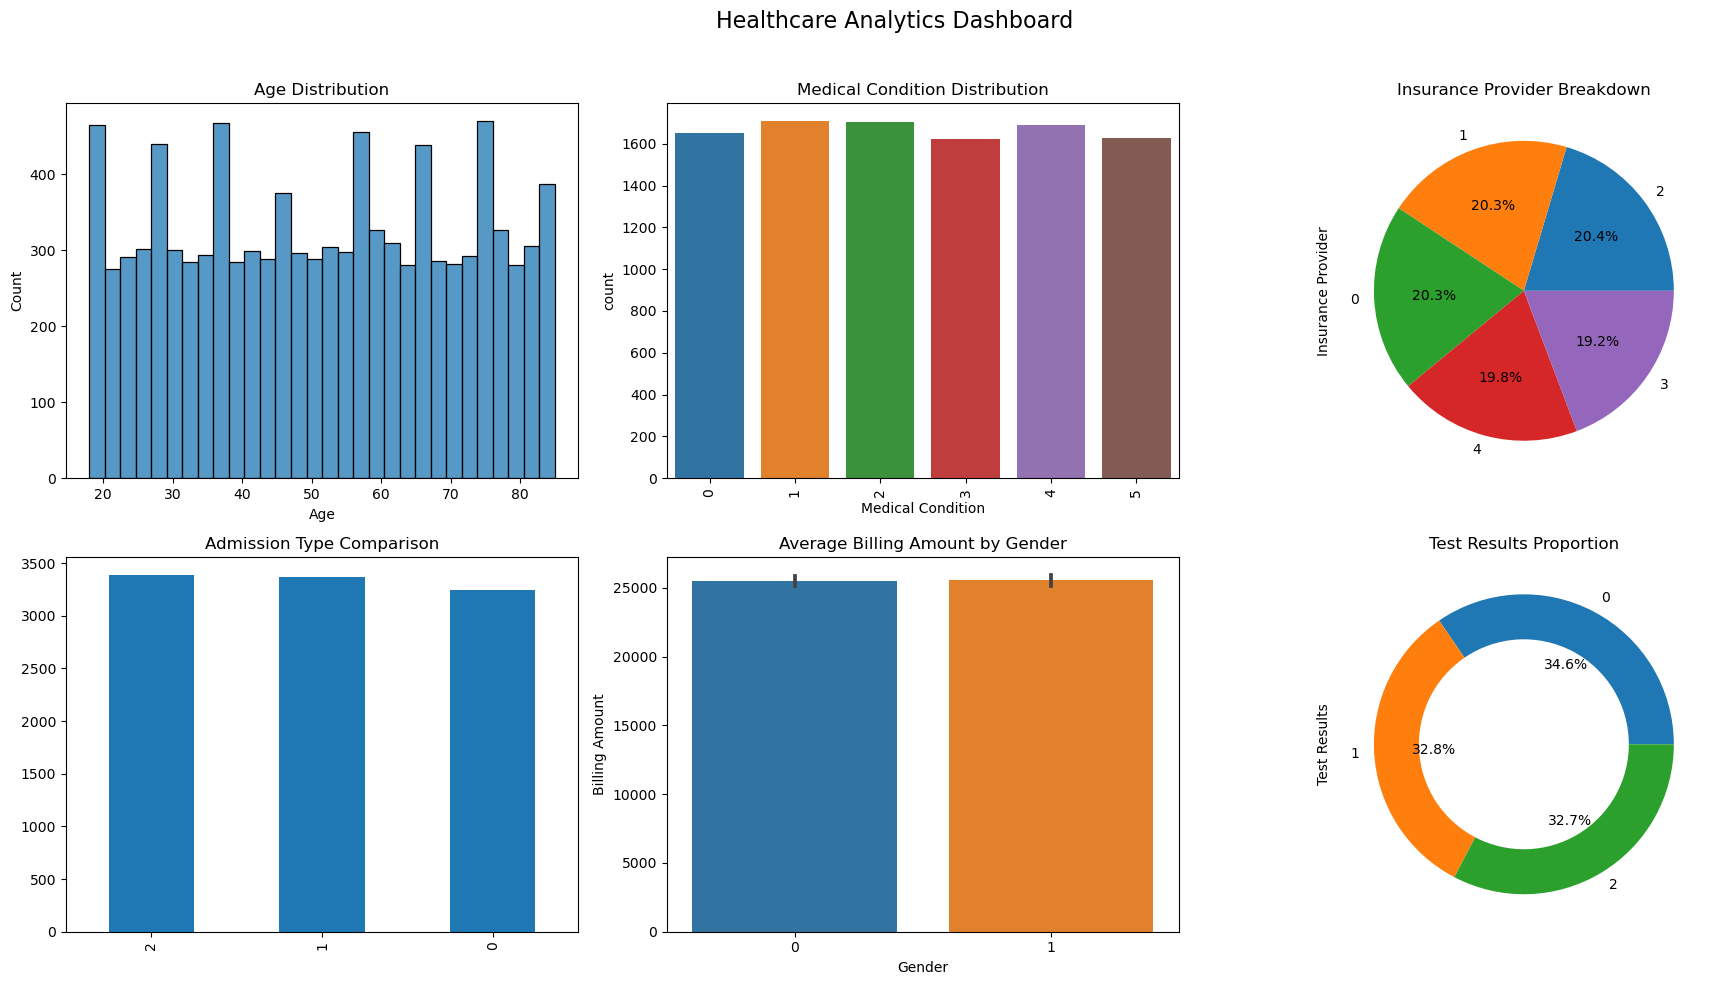

In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Set up a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Healthcare Analytics Dashboard', fontsize=16)

# Plot 1: Age Distribution
sns.histplot(data=df, x='Age', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plot 2: Medical Condition Distribution
sns.countplot(data=df, x='Medical Condition', ax=axes[0, 1])
axes[0, 1].set_title('Medical Condition Distribution')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot 3: Insurance Provider Breakdown
df['Insurance Provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 2])
axes[0, 2].set_title('Insurance Provider Breakdown')

# Plot 4: Admission Type Comparison
df['Admission Type'].value_counts().plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Admission Type Comparison')

# Plot 5: Average Billing Amount by Gender
sns.barplot(data=df, x='Gender', y='Billing Amount', estimator=np.mean, ax=axes[1, 1])
axes[1, 1].set_title('Average Billing Amount by Gender')

# Plot 6: Test Results Proportion
df['Test Results'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.3), ax=axes[1, 2])
axes[1, 2].set_title('Test Results Proportion')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the dashboard
plt.show()

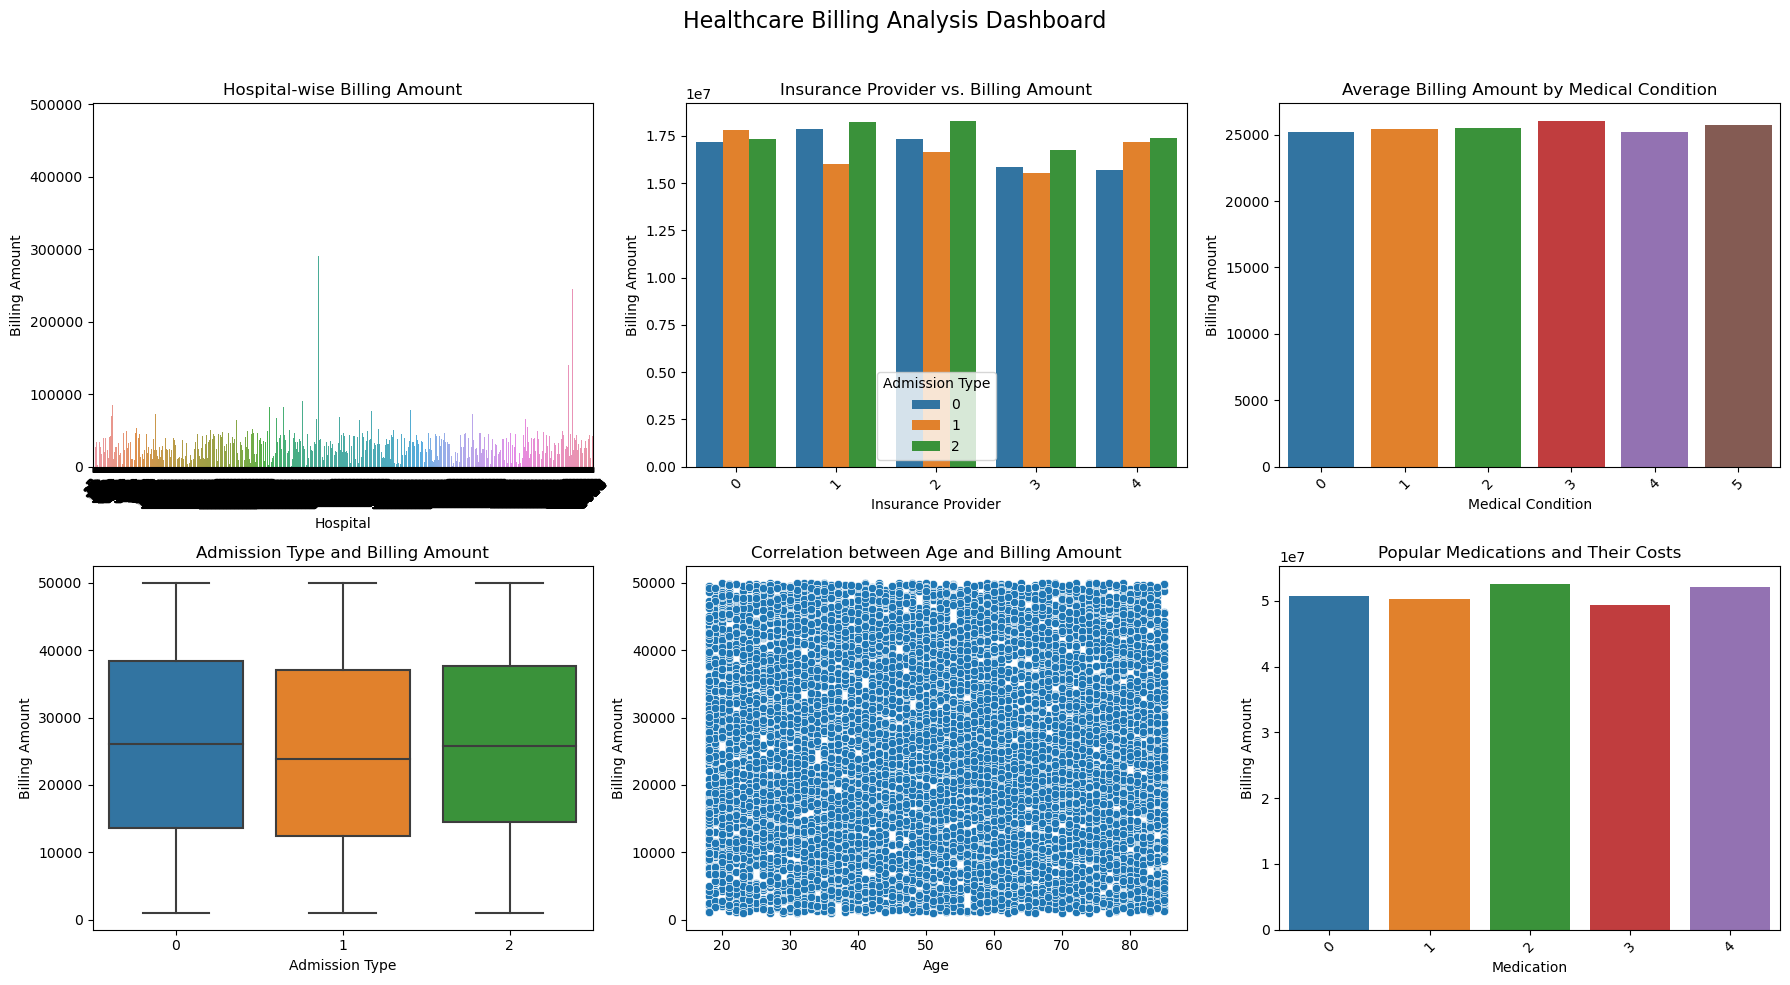

In [60]:
# Set up a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Healthcare Billing Analysis Dashboard', fontsize=16)

# Plot 1: Hospital-wise Billing Amount (Bar Chart)
sns.barplot(x='Hospital', y='Billing Amount', data=df, estimator=sum, errorbar=None, ax=axes[0, 0])
axes[0, 0].set_title('Hospital-wise Billing Amount')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Insurance Provider vs. Billing Amount (Grouped Bar Chart)
sns.barplot(x='Insurance Provider', y='Billing Amount', hue='Admission Type', data=df, estimator=sum, errorbar=None, ax=axes[0, 1])
axes[0, 1].set_title('Insurance Provider vs. Billing Amount')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Average Billing Amount by Medical Condition (Bar Chart)
sns.barplot(x='Medical Condition', y='Billing Amount', data=df, estimator='mean', errorbar=None, ax=axes[0, 2])
axes[0, 2].set_title('Average Billing Amount by Medical Condition')
axes[0, 2].tick_params(axis='x', rotation=45)

# Plot 4: Admission Type and Billing Amount (Box Plot)
sns.boxplot(x='Admission Type', y='Billing Amount', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Admission Type and Billing Amount')

# Plot 5: Correlation between Age and Billing Amount (Scatter Plot)
sns.scatterplot(x='Age', y='Billing Amount', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Correlation between Age and Billing Amount')

# Plot 6: Popular Medications and Their Costs (Bar Chart)
sns.barplot(x='Medication', y='Billing Amount', data=df, estimator=sum, errorbar=None, ax=axes[1, 2])
axes[1, 2].set_title('Popular Medications and Their Costs')
axes[1, 2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the dashboard
plt.show()

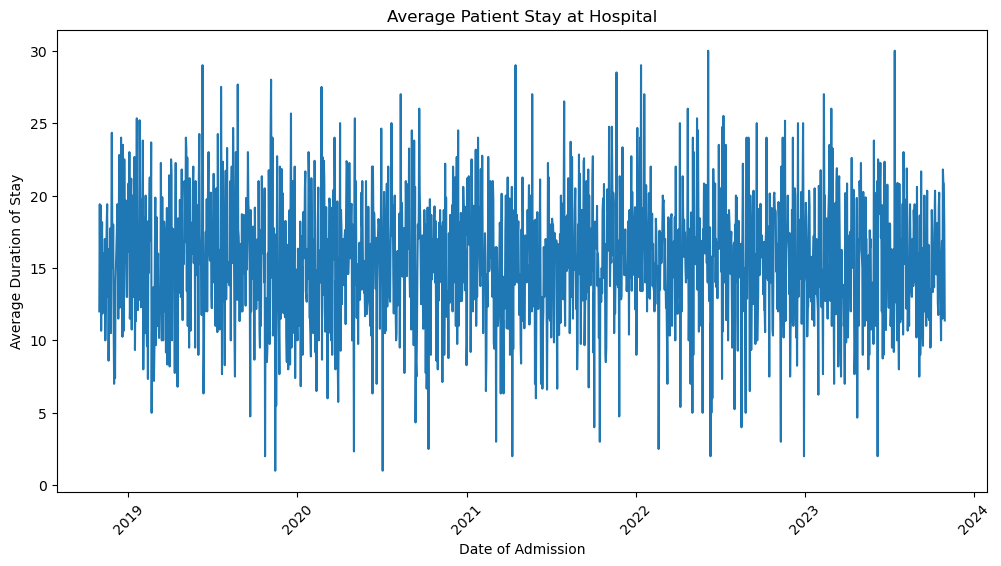

In [63]:
# Calculate the average duration of stay for each date
average_stay = df.groupby('Date of Admission')['Duration of Stay'].mean().reset_index()

# Plot the average stay chart
plt.figure(figsize=(12, 6))
plt.plot(average_stay['Date of Admission'], average_stay['Duration of Stay'])
plt.xlabel('Date of Admission')
plt.ylabel('Average Duration of Stay')
plt.title('Average Patient Stay at Hospital')
plt.xticks(rotation=45)
plt.show()


In [88]:
#modeling using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into X and y
X = df.select_dtypes(include=[np.number])
y = df['Test Results']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model with training data
model = model.fit(X_train, y_train)

# Make predictions using test data
y_pred = model.predict(X_test)

In [89]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy Score: 0.3435
Confusion Matrix: 
[[499 207   0]
 [448 188   0]
 [447 211   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.36      0.71      0.48       706
           1       0.31      0.30      0.30       636
           2       0.00      0.00      0.00       658

    accuracy                           0.34      2000
   macro avg       0.22      0.33      0.26      2000
weighted avg       0.23      0.34      0.26      2000



c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [94]:
#modelin usinggg knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#create model
model = KNeighborsClassifier(n_neighbors=5)

#split data into x and y
X = df.select_dtypes(include=[np.number])
y = df['Test Results']

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit model with training data
model = model.fit(X_train, y_train)

#make predictions using test data
y_pred = model.predict(X_test)



In [95]:
#evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy Score: 0.3395
Confusion Matrix: 
[[345 223 138]
 [302 211 123]
 [326 209 123]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.35      0.49      0.41       706
           1       0.33      0.33      0.33       636
           2       0.32      0.19      0.24       658

    accuracy                           0.34      2000
   macro avg       0.33      0.34      0.33      2000
weighted avg       0.33      0.34      0.33      2000



accuracy score hanya 0.3 karena data distribution yang uniform
